In [ ]:
!pip install -q scikit-learn matplotlib

In [10]:
# load data
import torch
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X, y = iris.data, iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train = torch.tensor(X_train, dtype = torch.float32)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.long)
y_test = torch.tensor(y_test, dtype = torch.long)

print("Data Loaded and Preprocessed")




Data Loaded and Preprocessed


In [13]:
import torch
import torch.nn.functional as F

# Set manual seed for reproducibility
torch.manual_seed(0)

input_size = 4
hidden_size = 16
output_size = 3
learning_rate = 0.01

#weight and bias
W1 = torch.randn(input_size, hidden_size, requires_grad = True)
b1 = torch.randn(hidden_size, requires_grad = True)

W2 = torch.randn(hidden_size, output_size, requires_grad = True)
b2 = torch.randn(output_size, requires_grad = True)

def relu(x):
  return x.clamp(min = 0)

def forward(x):
  z1 = x @ W1 + b1
  a = relu(z1)
  z2 = a @ W2 + b2
  return z2

# Training Loop
num_epochs = 50
train_acc_history = []
test_acc_history = []

for epoch in range(num_epochs):
    # Forward pass
    logits = forward(X_train)
    loss = F.cross_entropy(logits, y_train)
    # Backward pass
    loss.backward()
    with torch.no_grad():
        W1 -= learning_rate * W1.grad
        b1 -= learning_rate * b1.grad
        W2 -= learning_rate * W2.grad
        b2 -= learning_rate * b2.grad

        # reset gradients
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()


    with torch.no_grad():
        train_preds = forward(X_train).argmax(dim=1)
        test_preds  = forward(X_test).argmax(dim=1)
        train_acc = (train_preds == y_train).float().mean().item()
        test_acc  = (test_preds == y_test).float().mean().item()

    train_acc_history.append(train_acc)
    test_acc_history.append(test_acc)

    print(f"Epoch {epoch+1}/{num_epochs} | Loss: {loss.item():.4f} "
          f"| Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

Epoch 1/50 | Loss: 5.3213 | Train Acc: 0.4167 | Test Acc: 0.3667
Epoch 2/50 | Loss: 5.1153 | Train Acc: 0.4167 | Test Acc: 0.3667
Epoch 3/50 | Loss: 4.9195 | Train Acc: 0.4167 | Test Acc: 0.3667
Epoch 4/50 | Loss: 4.7322 | Train Acc: 0.4250 | Test Acc: 0.3667
Epoch 5/50 | Loss: 4.5534 | Train Acc: 0.4333 | Test Acc: 0.4000
Epoch 6/50 | Loss: 4.3818 | Train Acc: 0.4500 | Test Acc: 0.4000
Epoch 7/50 | Loss: 4.2157 | Train Acc: 0.4583 | Test Acc: 0.4000
Epoch 8/50 | Loss: 4.0542 | Train Acc: 0.4583 | Test Acc: 0.4000
Epoch 9/50 | Loss: 3.8973 | Train Acc: 0.4667 | Test Acc: 0.4000
Epoch 10/50 | Loss: 3.7468 | Train Acc: 0.4833 | Test Acc: 0.4000
Epoch 11/50 | Loss: 3.6025 | Train Acc: 0.4833 | Test Acc: 0.4333
Epoch 12/50 | Loss: 3.4670 | Train Acc: 0.4833 | Test Acc: 0.4667
Epoch 13/50 | Loss: 3.3403 | Train Acc: 0.4833 | Test Acc: 0.4667
Epoch 14/50 | Loss: 3.2218 | Train Acc: 0.4917 | Test Acc: 0.4667
Epoch 15/50 | Loss: 3.1129 | Train Acc: 0.5000 | Test Acc: 0.4667
Epoch 16/50 | Loss:

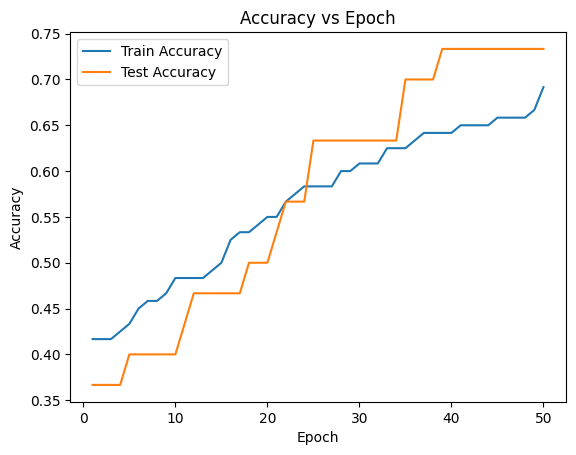

In [12]:
import matplotlib.pyplot as plt

epochs = list(range(1, num_epochs + 1))
plt.plot(epochs, train_acc_history, label="Train Accuracy")
plt.plot(epochs, test_acc_history, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.legend()
plt.show()
